In [47]:
import sklearn.datasets
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)

In [90]:
diabet = load_diabetes()

In [91]:
print(diabet.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [92]:
diabet.data.shape

(442, 10)

In [93]:
diabet

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [30]:
X = diabet.data
y = diabet.target

In [35]:
X_lda = lda.fit_transform(X, y)

In [36]:
X_lda

array([[ 1.66315006e+00],
       [-2.31198262e+00],
       [ 7.50925129e-01],
       [ 4.25009179e-01],
       [-7.60775288e-01],
       [-7.10156564e-01],
       [-1.73188851e+00],
       [-1.29240797e+00],
       [ 2.45281480e-01],
       [ 2.12783063e+00],
       [-8.40507780e-01],
       [-1.83919208e+00],
       [-9.89330926e-01],
       [ 5.33336858e-01],
       [-1.45889495e+00],
       [ 2.32241071e-01],
       [ 1.58416674e+00],
       [ 7.21009335e-01],
       [-1.43094029e-02],
       [-5.64549073e-01],
       [-5.99725930e-01],
       [-1.50636825e+00],
       [-8.95827753e-01],
       [ 3.10011654e+00],
       [ 3.97307559e-01],
       [ 1.25371987e-01],
       [-1.02649670e+00],
       [ 7.82895070e-01],
       [-2.80784465e-01],
       [ 1.27090349e+00],
       [ 3.12226223e-01],
       [-1.87559825e+00],
       [ 2.29554546e+00],
       [-1.22378892e+00],
       [-1.76544159e+00],
       [-1.86713447e+00],
       [ 1.75156457e+00],
       [ 3.29554777e-01],
       [ 2.1

In [98]:
X_lda.shape

(442, 1)

In [61]:
 y = y.reshape(442, 1)

In [99]:
y.shape

(442, 1)

In [104]:
def smse_loss(y_true, y_pred):
    n = len(y_true)
    return np.sum((y_true - y_pred)**2) / (2 * n)

def smae_loss(y_true, y_pred):
    n = len(y_true)
    return np.sum(np.abs(y_true - y_pred)) / (2 * n)


In [105]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    grad = (np.dot(w, X[train_ind]) - y[train_ind]) / len(y)
    return w - 2 * eta * grad


In [106]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    weight_dist = np.inf
    w = w_init
    errors = []
    iter_num = 0
    np.random.seed(seed)
        
    while weight_dist > min_weight_dist and iter_num < max_iter:
        tmp_weights = w
        random_ind = np.random.randint(X.shape[0])

        w = stochastic_gradient_step(X, y, w, random_ind, eta)
        errors.append(smse_loss(np.dot(X, w), y))
        
        weight_dist = np.linalg.norm(tmp_weights - w, 2)
        iter_num += 1
        
    return w, errors


In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [131]:
w_init = np.random.rand(X_train.shape[1])

In [132]:
w, errors = stochastic_gradient_descent(X_train, y_train, w_init)

y_pred_custom = np.dot(X_test, w)

MSE: 35442.80
MSLE: 1.90
MAE: 169.68
R2: -5.69
RMSE: 188.26


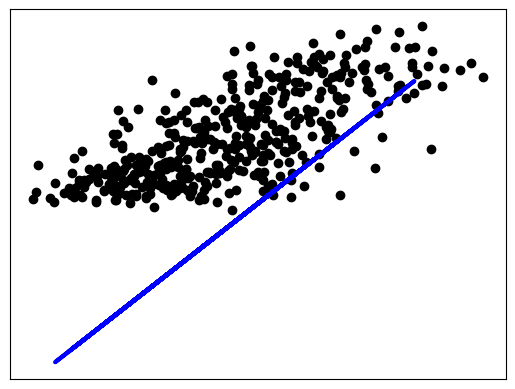

In [135]:
print("MSE: %.2f" % mean_squared_error(y_test, y_pred_custom))
print("MSLE: %.2f" % mean_squared_log_error(abs(y_test), abs(y_pred_custom)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred_custom))
print("R2: %.2f" % r2_score(y_test, y_pred_custom))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred_custom)))


plt.scatter(X_lda, y, color="black")
plt.plot(X_test, y_pred_custom, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [84]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

In [74]:
linreg = linear_model.LinearRegression()

In [136]:
linreg.fit(X_train, y_train)

LinearRegression()

In [137]:
y_pred = linreg.predict(X_test) 

MSE: 2822.68
MSLE: 0.17
MAE: 42.26
R2: 0.47
RMSE: 53.13


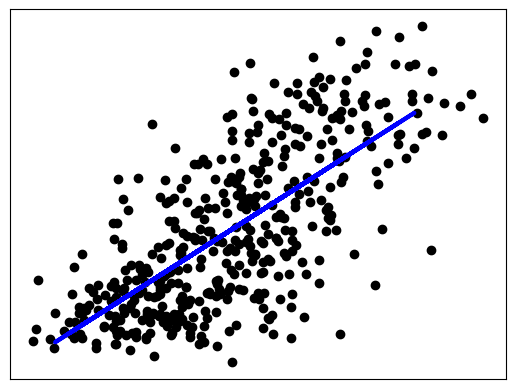

In [138]:
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("MSLE: %.2f" % mean_squared_log_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))
print("RMSE: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))


# Plot outputs
plt.scatter(X_lda, y, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

### Метод Линейной Регрессии из sklearn оказался сильно эффективнее по всем предоставленным метрикам чем реализация через использование  градиентного спуска. + метод лин. регресси sklearn будет считаться менее подверженным переобучению.

In [7]:
import pandas as pd

In [141]:
songs = pd.read_csv("test.csv")

In [142]:
songs.head()

,Song,Song year,Artist,Genre,Lyrics,Track_id
0,craftsmanship,2005,buck-65,Hip-Hop,Most folks spend their days daydreaming of fin...,8294
1,come-on-out,2012,the-elwins,Indie,Take your cold hands and put them on my face\n...,21621
2,riot,2013,bullet-for-my-valentine,Metal,Are you ready it's time for war\nWe'll break d...,3301
3,that-s-what-girls-do,2007,dream-street,Pop,You ask me why I change the color of my hair\n...,2773
4,believe-in-a-dollar,2012,cassidy,Hip-Hop,Do you believe in magic in a young girl's hear...,16797


In [150]:
df = songs.drop(columns=["Song","Song year", "Artist","Track_id"])

In [151]:
df

,Genre,Lyrics
0,Hip-Hop,Most folks spend their days daydreaming of fin...
1,Indie,Take your cold hands and put them on my face\n...
2,Metal,Are you ready it's time for war\nWe'll break d...
3,Pop,You ask me why I change the color of my hair\n...
4,Hip-Hop,Do you believe in magic in a young girl's hear...
...,...,...
7930,Rock,Tuesday night - 7:30\nI hear a voice on the te...
7931,Metal,Elite forces cloaked in fur un sensitive to pa...
7932,Hip-Hop,[Dr. Dre]\nJourney with me\nInto the mind of a...
7933,Rock,You can a look a hurricane right in the eye.\n...


In [189]:
df["Genre"].unique()

array(['Hip-Hop', 'Indie', 'Metal', 'Pop', 'Country', 'Jazz', 'Rock',
       'R&B', 'Electronic', 'Folk'], dtype=object)

In [201]:
df["Lyrics"] = df["Lyrics"].apply(lambda x: x.replace("\n", " ") and x.replace(",", "") and x.lower()  and x.replace("'", " ") and x.replace(")", "") and x.replace("(", ""))
df["Lyrics"] = df["Lyrics"].str.replace("?", "")

In [202]:
df["Lyrics"][0]

'most folks spend their days daydreaming of finding clues my whole life ive been here at the train station shining shoes i started when i was nine on my own and taught myself no complaints im doing pretty good and i got my health memories and callouses my hearings probably next to go sometimes i do a little handywork for extra dough but mostly this here is how i spend my time and ive perfected a technique i call the dry shine some guys use lots of water on the shoe but then when its out in the open air the shine is gone in 10 minutes that whole approach to the job is dumb in fact dollars to donuts that customer wont be coming back this is the most common mistake of the amateurs going for big numbers to satisfy their managers anyway the dry shine the first thing i mean to do and this part is very important i clean the shoe: the residue and old polish to keep a shoe from being ruined all you need to do is use a rag with some cleaning fluid if the shoes all caked up with gunk you need to 

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)

In [204]:
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,  
    max_df=0.8,  
    min_df=5  
)

In [205]:
from sklearn.pipeline import Pipeline

In [206]:
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('kmeans', kmeans)
])

In [216]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Genre_encoded'] = label_encoder.fit_transform(df['Genre'])

df["Genre_encoded"].unique()

array([3, 4, 6, 7, 0, 5, 9, 8, 1, 2])

In [217]:
clusters = pipeline.fit_predict(df['Lyrics']) 

genre = [3, 4, 6, 7, 0, 5, 9, 8, 1, 2]

for i in range(10): 
    print(f"Cluster {genre[i]}:")
    sample_index = clusters == i
    print(df.loc[sample_index, 'Lyrics'].head(1))

Cluster 3:
55    i said hey hey hey hey yeah i said hey hey hey...
Name: Lyrics, dtype: object
Cluster 4:
5    people starin at me as they wheel me down the ...
Name: Lyrics, dtype: object
Cluster 6:
0    most folks spend their days daydreaming of fin...
Name: Lyrics, dtype: object
Cluster 7:
13    take off your shoes sit on the floor ill make ...
Name: Lyrics, dtype: object
Cluster 0:
11    close your eyes close the door you dont have t...
Name: Lyrics, dtype: object
Cluster 5:
2    are you ready its time for war well break down...
Name: Lyrics, dtype: object
Cluster 9:
4    do you believe in magic in a young girls heart...
Name: Lyrics, dtype: object
Cluster 8:
8    all the things we lost in the fire all the thi...
Name: Lyrics, dtype: object
Cluster 1:
122    mary is a sailor dreaming of northern shores l...
Name: Lyrics, dtype: object
Cluster 2:
7    tell mel shawn to come in word yo one life to ...
Name: Lyrics, dtype: object


In [225]:
from sklearn.metrics import adjusted_rand_score
from sklearn import datasets, metrics

pred_genres = pipeline.predict(df['Lyrics']) 
genres = df['Genre'] 

data = []
data.append({  "ARI": metrics.adjusted_rand_score(genres, pred_genres),
                "AMI": metrics.adjusted_mutual_info_score(genres, pred_genres),
                "Homogenity": metrics.homogeneity_score(genres, pred_genres),
                "Completeness": metrics.completeness_score(genres, pred_genres),
                "V-measure": metrics.v_measure_score(genres, pred_genres),
                "Silhouette": metrics.silhouette_score(pipeline.named_steps['tfidf'].transform(df['Lyrics']), pred_genres)})

results = pd.DataFrame(
    data=data,
    columns=["ARI", "AMI", "Homogenity", "Completeness", "V-measure", "Silhouette"],
    index=["K-means"],
)

In [226]:
results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.045583,0.090197,0.084018,0.10287,0.092493,0.002766


### Согласны ли Вы с тем, что разделять песни по жанрам только на основе текста – это плохая идея?

### По результатам, конечно, отчётливо можно судить, что разделять песни по жанрам только на основе текста - это очень нехорошая идея...